 # Dataset Profiling...

## Load the libraries:

In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

## Import the data

D:/SHU_Drive/ADMP/Assignment/data/Dirty_Data

In [2]:
top_200_weekly = pd.read_csv("D:/SHU_Drive/ADMP/Assignment/data/Dirty_Data/top_200_weekly.csv")
spotify_track_details = pd.read_csv("D:/SHU_Drive/ADMP/Assignment/data/Dirty_Data/spotify_track_details.csv")
ukEvents = pd.read_csv("D:/SHU_Drive/ADMP/Assignment/data/Dirty_Data/ukEvents.csv")
ukVenues = pd.read_csv("D:/SHU_Drive/ADMP/Assignment/data/Dirty_Data/ukVenues.csv")
artists = pd.read_csv("D:/SHU_Drive/ADMP/Assignment/data/Dirty_Data/artists.csv")

## Generate report:

In [ ]:
profile = ProfileReport(top_200_weekly, title="Spotify Weekly Top 200", html={'style': {'full_width': True}}, sort="None")
profile.to_file(output_file="spotify_weekly_top_200.html")

In [ ]:
profile = ProfileReport(spotify_track_details, title="spotify_track_details", html={'style': {'full_width': True}}, sort="None")
profile.to_file(output_file="spotify_track_details.html")

In [ ]:
profile = ProfileReport(ukEvents, title="ukEvents", html={'style': {'full_width': True}}, sort="None")
profile.to_file(output_file="ukEvents.html")

In [ ]:
profile = ProfileReport(ukVenues, title="ukVenues", html={'style': {'full_width': True}}, sort="None")
profile.to_file(output_file="ukVenues.html")

In [ ]:
profile = ProfileReport(artists, title="artists", html={'style': {'full_width': True}}, sort="None")
profile.to_file(output_file="artists.html")

In [ ]:
top_200_weekly.head()
top_200_weekly

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(top_200_weekly["Streams"].dropna());

In [ ]:
top_200_weekly.head()

In [ ]:
uk_only = top_200_weekly[top_200_weekly['region']=='gb']
uk_only[['Start','End']] = uk_only['date'].str.split('--', expand=True)
uk_only['month'] = pd.to_datetime(uk_only['Start']).dt.to_period('M')
uk_only.head()

In [ ]:
help(uk_only.plot)

In [ ]:
uk_only.groupby(['month']).sum().plot(y='Streams', kind='barh', title='Stream Count Trend')

In [ ]:
spotify_track_details.head(2)

In [ ]:
spotify_track_details.groupby(['artist_name']).mean().plot(y='track_popularity', kind='barh', title='Tracks Popularity')

In [ ]:
ukEvents.head(1)

In [39]:
df = ukEvents.drop_duplicates(['eventID','artistMBID'], keep='last')
df['eventID'].count()
df.head(1)

,eventID,eventName,eventType,eventPopularity,eventURI,eventAgeRestriction,artistMBID,venueID,eventStartDate,eventStartTime,venueCountry,eventFlaggedAsEnded
0,35852009,"Massive Attack at Steel Yard (March 1, 2019)",Concert,0.19309,http://www.songkick.com/concerts/35852009-mass...,NaN,10adbe5e-a2c0-4bf3-8249-2b4cbf6e6ca8,4083734.0,2019-03-01,17:30:00,UK,True


In [6]:
df.groupby(['eventType'])['eventID'].count().head(2) #.plot(y='eventType', kind='barh', title='Stream Count Trend')

eventType = pd.DataFrame(df.groupby(['eventType'])['eventID'].count(), index = None)
eventType.reset_index(level=0, inplace=True)

eventType.head()



,eventType,eventID
0,Concert,57831
1,Festival,11633


In [22]:
df['eventType'][0]

'Concert'

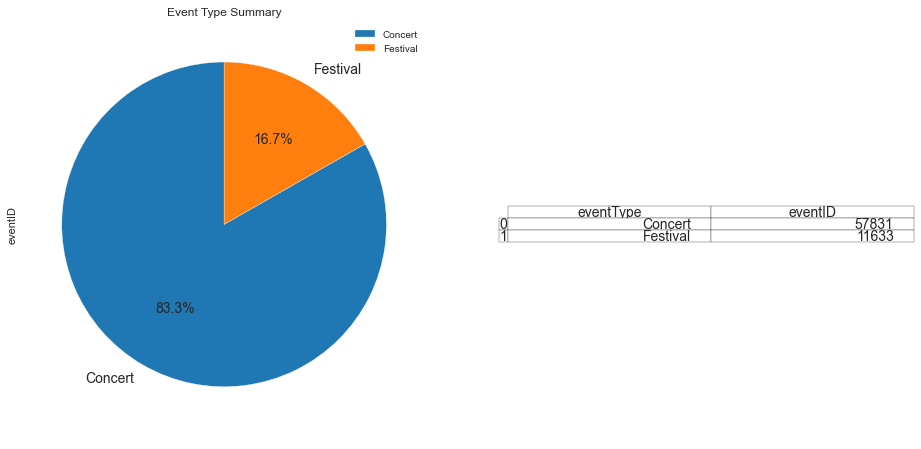

In [36]:
import matplotlib.pyplot as plt
from pandas.plotting import table
df = eventType
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
ax1.legend((df['eventType'][0], df['eventType'][1]))

#legend(('y0','y1'))
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
df.plot(kind='pie', y = 'eventID', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['eventType'], legend = True, fontsize=14, title='Event Type Summary')

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

In [46]:
help(ukVenues.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

In [62]:
ukVenues.head(1)

,venueID,venueName,venueStreet,venuePostcode,venueCity,venueCountry,venueCapacity,venueWebsite,venuePhone
0,1561,The Sugarmill,Brunswick Street,ST1 1DR,Stoke On Trent,UK,400.0,http://www.thesugarmill.co.uk/,01782 214991


In [67]:
ukVenues.head(1)
city = pd.DataFrame(ukVenues.groupby(['venueCity']).count(), index = None)
city.reset_index(level=0, inplace=True)

city.head(200)

city[city['venueCapacity']>100]



,venueCity,venueID,venueName,venueStreet,venuePostcode,venueCountry,venueCapacity,venueWebsite,venuePhone
587,London,904,904,792,799,904,158,415,250


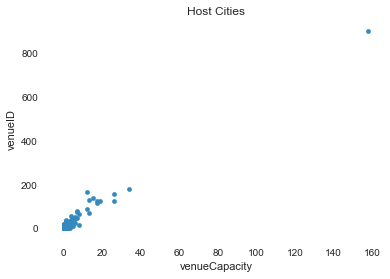

In [64]:
city.plot(y='venueID', x='venueCapacity',kind='scatter', title='Host Cities')

#ax.scatter(x=data[:,0],y=data[:,1],label='Data')
#ukVenues.groupby(['venueCity']).count().plot(y='track_popularity', kind='barh', title='Tracks Popularity')

In [54]:
data = city
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Host Cities')
ax.scatter(x=data[:,1],y=data[:,2],label='Data')
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting 
Line')
ax.set_xlabel('Ciy')
ax.set_ylabel('Count')
ax.legend(loc='best')
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-54-944485856811>, line 6)

In [55]:

#grp_artist = artists.groupby(['ended'])['gid'].count().plot(kind='pie',title = 'Artist Active Status')
#grp_artist.head()

status = pd.DataFrame(artists.groupby(['ended'])['gid'].count(), index = None)
status
status.reset_index(level=0, inplace=True)
status.columns
status.head()


,ended,gid
0,False,1514086
1,True,96449


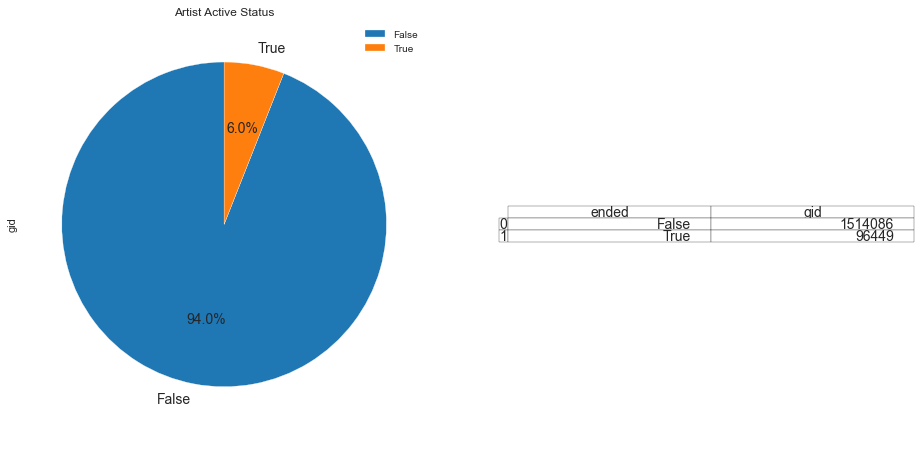

In [61]:
pie_plot(status)

In [60]:
import matplotlib.pyplot as plt
from pandas.plotting import table
def pie_plot(df):
    plt.figure(figsize=(16,8))
    # plot chart
    ax1 = plt.subplot(121, aspect='equal')
    df.plot(kind='pie', y = 'gid', ax=ax1, autopct='%1.1f%%', 
     startangle=90, shadow=False, labels=df['ended'], legend = True, fontsize=14, title='Artist Active Status')

    # plot table
    ax2 = plt.subplot(122)
    plt.axis('off')
    tbl = table(ax2, df, loc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(14)
    plt.show()

In [ ]:
artists.groupby(['ended']).sum().plot(y='Count', kind='pie', title='Astist Status')

In [ ]:
uk_streams[['Start','End']] = uk_streams['date'].str.split('--', expand=True)
uk_streams.head()

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
streams['Streams'].hist(bins=50)

NameError: name 'streams' is not defined